# Практическая работа 8. Основы обучаемых алгоритмов

###Выполнил студент ПИН-Б-З-22-1 Зинченко Сергей Алексеевич<br>


##Индивидуальное задание <br>
В каждом варианте необходимо выполнить визуализацию данных,
хранящихся в файле с использованием библиотеки matplotlib. Необходимо обучить
модель регрессии и найти значения параметров, а также визуализировать факт, что
ваша модель хорошо интерпретирует эмпирические данные. Необходимо провести
эксперименты со следующими параметрами: скорость обучения, начальные
значения параметров. Определите их влияние на процесс обучения алгоритма.

Импорт файла для моего 6-го варианта

In [1]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract13/pr13_06.txt


--2025-06-20 20:41:06--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract13/pr13_06.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5832 (5.7K) [text/plain]
Saving to: ‘pr13_06.txt’

pr13_06.txt         100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-06-20 20:41:06 (56.2 MB/s) - ‘pr13_06.txt’ saved [5832/5832]



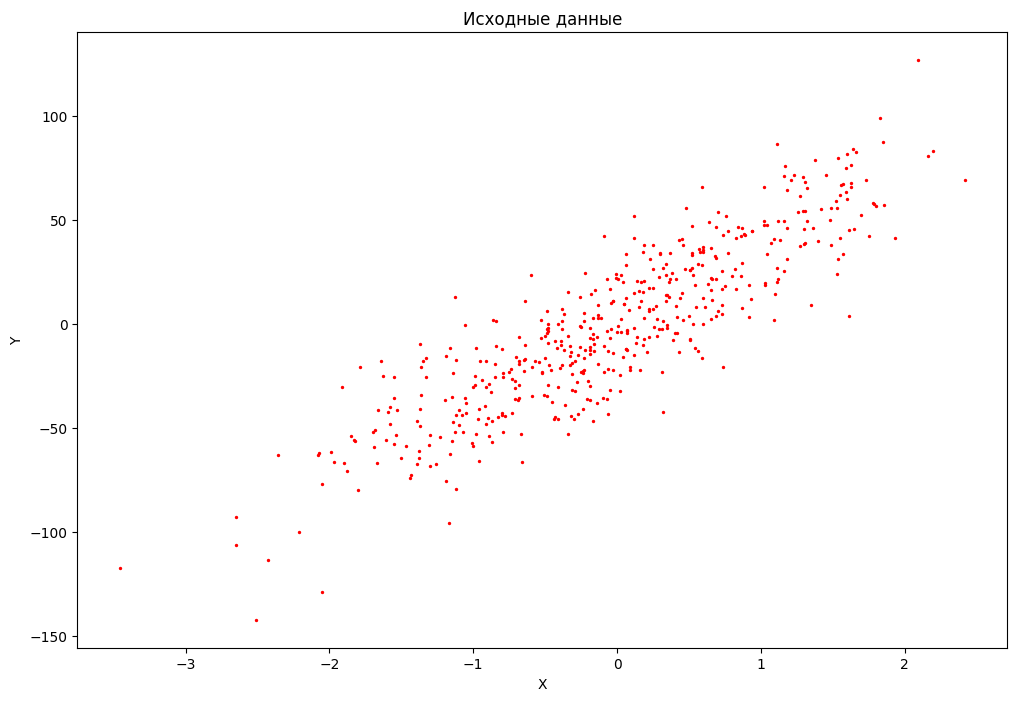

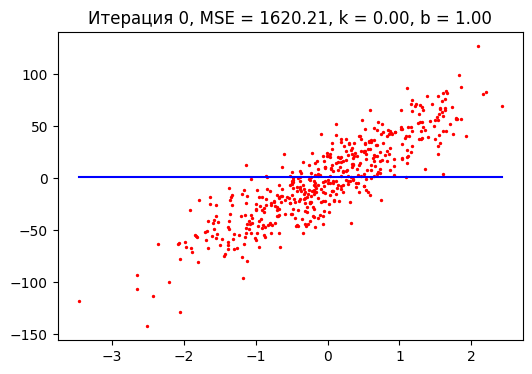

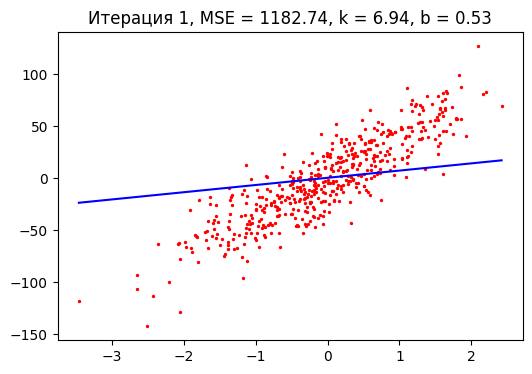

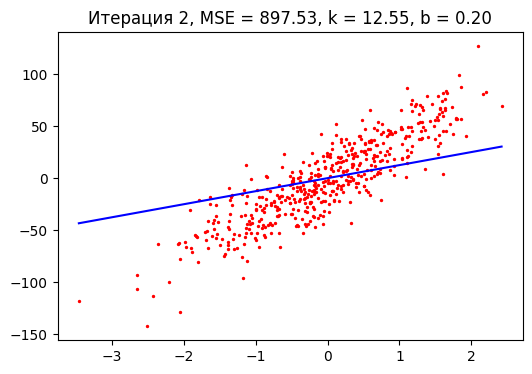

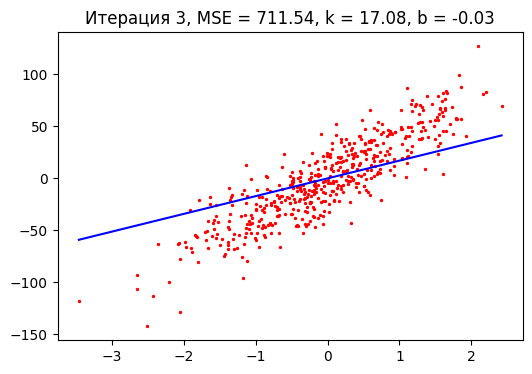

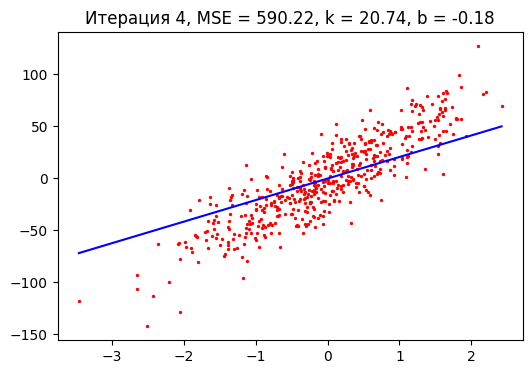

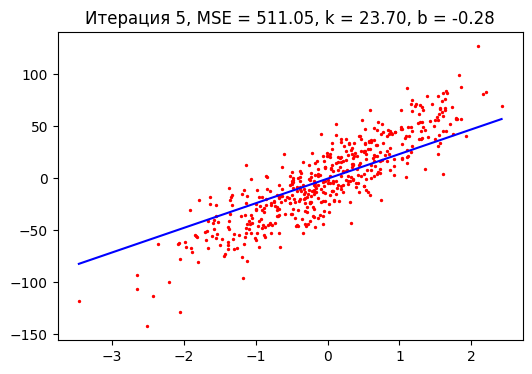

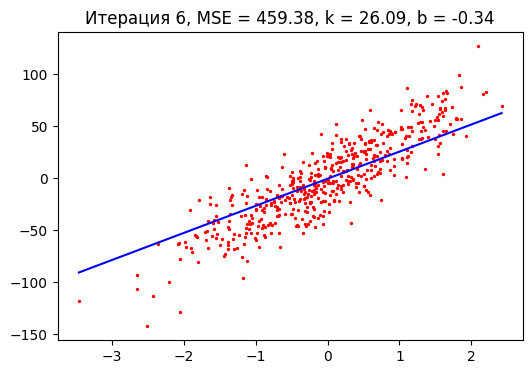

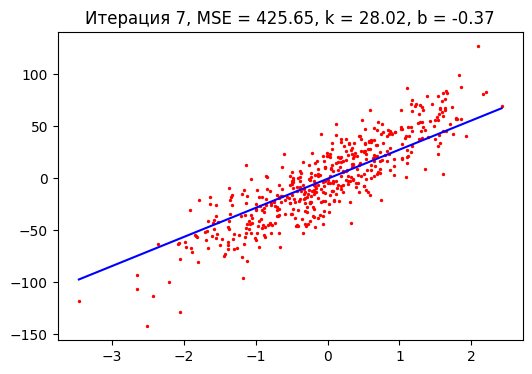

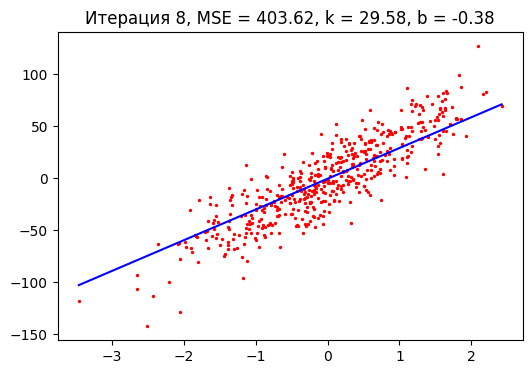

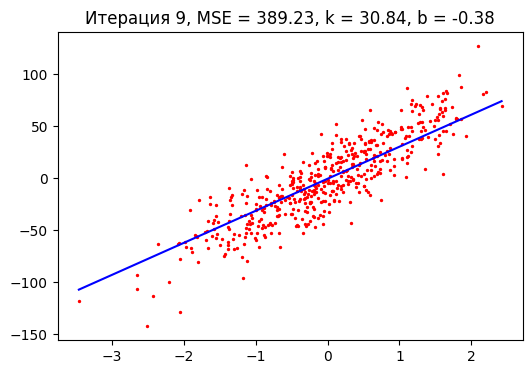

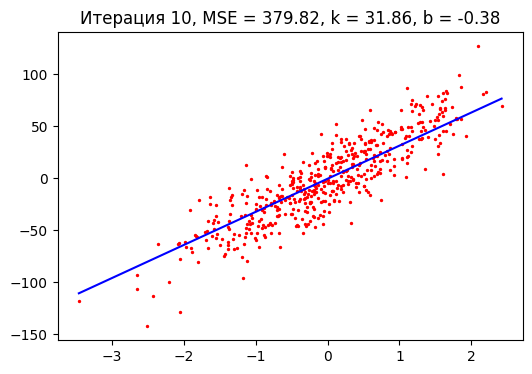

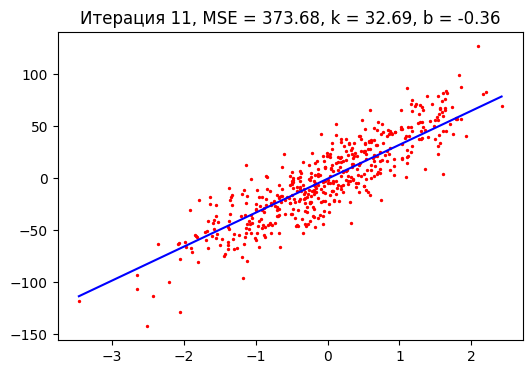

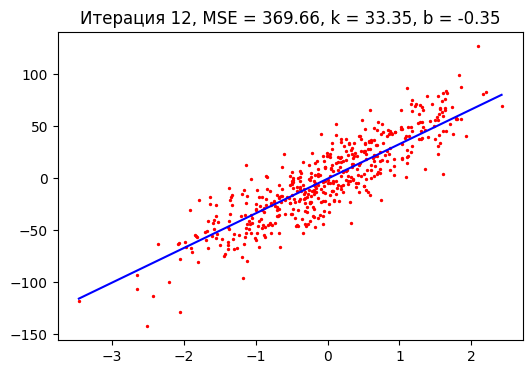

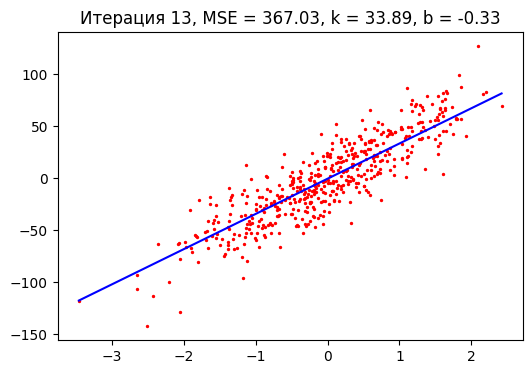

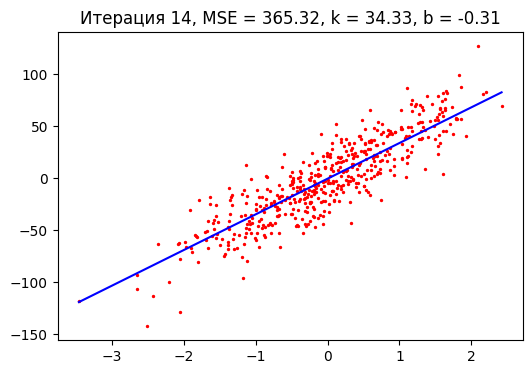

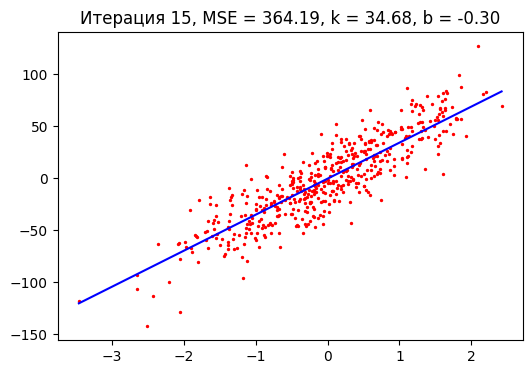

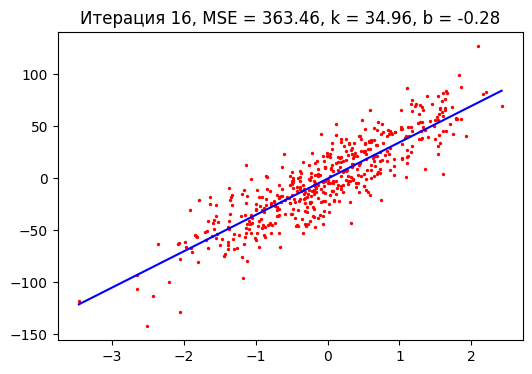

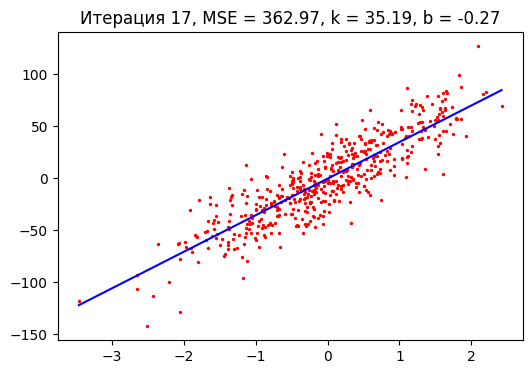

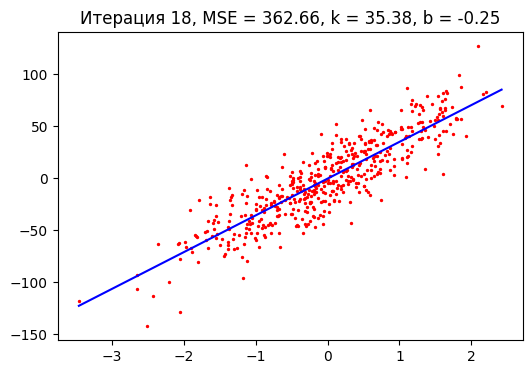

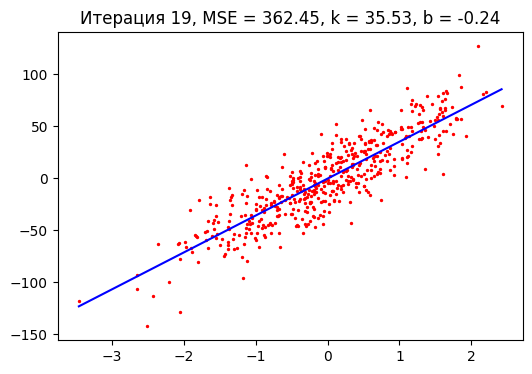

MSE = 362.45, k = 35.65, b = -0.23


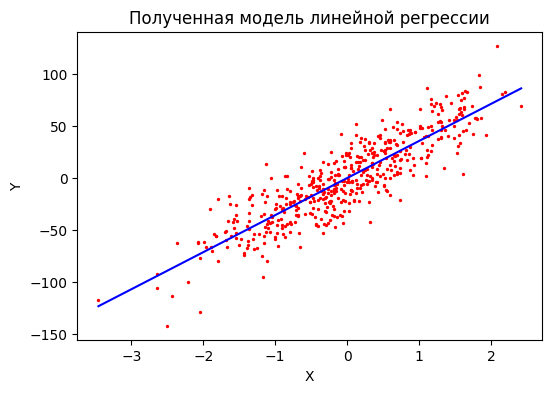

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = np.loadtxt('pr13_06.txt')
X = data[:, 0]  # Координаты X точек
y = data[:, 1]  # Координаты Y точек
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='red', s=2)
plt.title('Исходные данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

k, b = 0.0, 1.0

xmin, xmax = min(X), max(X)
# Скорость обучения
alpha = 0.1
# Количество итераций обучения
N = 20
#процесс обучения с помощью градиентного спуска
for i in range(N):
    y_pred = k * X + b
    MSE = np.sum((y - y_pred) ** 2) / y.shape[0]
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='red', s=2)
    plt.plot([xmin, xmax], [k * xmin + b, k * xmax + b], color='blue')
    plt.title(f'Итерация {i}, MSE = {MSE:.2f}, k = {k:.2f}, b = {b:.2f}')
    plt.show()
    gk = -2 * np.dot(X.reshape(-1, 1).T, (y - y_pred)) / y.shape[0]
    gb = -2 * np.sum(y - y_pred) / y.shape[0]
    k = k - alpha * gk[0]
    b = b - alpha * gb
print(f'MSE = {MSE:.2f}, k = {k:.2f}, b = {b:.2f}')
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='red', s=2)
plt.plot([xmin, xmax], [k * xmin + b, k * xmax + b], color='blue')
plt.title('Полученная модель линейной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##Ответы на контрольные вопросы

1. Действительно ли алгоритмы могут обучаться? В чем заключается процесс
обучения?<br>

Да. Процесс обучения заключается в том, что алгоритм анализирует данные и корректирует свои параметры, чтобы минимизировать ошибку на этих данных. Это достигается путем многократного применения функции потерь и корректировки параметров модели на основе градиента этой функции.

2. Что такое модель линейной регрессии? <br>

Модель линейной регрессии - это статистическая модель, которая предполагает линейную зависимость между зависимой переменной (целевой) и одной или несколькими независимыми переменными (признаками).
3. Каким образом производится подбор параметров модели в процессе
градиентного спуска?

В процессе градиентного спуска параметры модели (в данном случае k и b) корректируются на каждой итерации обучения. Это происходит путем вычисления градиента функции потерь (ошибки) относительно каждого параметра и обновления параметров в направлении, противоположном градиенту. Формулы для обновления параметров выглядят следующим образом:


k = k - alpha * gk

b = b - alpha * gb
где alpha - скорость обучения, gk и gb - градиенты ошибки для параметров k и b

4. Что такое темп обучения? Как влияет данный гиперпараметр на процесс
обучения?

Темп обучения (alpha) - это гиперпараметр, который определяет, насколько сильно параметры модели будут корректироваться на каждой итерации обучения. Он влияет на скорость сходимости алгоритма и его стабильность.

Слишком высокий темп обучения может привести к перескоку через минимум функции потерь, что приведет к нестабильности и недообучению.

Слишком низкий темп обучения может привести к очень медленной сходимости и, возможно, к застреванию в локальном минимуме.

5. Перечислите основные типы диаграмм matplotlib и функции, которые
реализуют построение графиков данных типов.

Линейный график (line plot):

- Функция: plt.plot(x, y)

Гистограмма (histogram):

- Функция: plt.hist(data, bins)

Точечный график (scatter plot):

- Функция: plt.scatter(x, y)

Столбчатая диаграмма (bar chart):

- Функция: plt.bar(x, height)

Горизонтальная столбчатая диаграмма (horizontal bar chart):

- Функция: plt.barh(y, width)

Круговая диаграмма (pie chart):

- Функция: plt.pie(sizes, labels=labels)

Ящик с усами (box plot):

- Функция: plt.boxplot(data)

Контурный график (contour plot):

- Функция: plt.contour(X, Y, Z)

Тепловая карта (heatmap):

- Функция: plt.imshow(Z, cmap='viridis')

График функции (function plot):

- Функция: plt.plot(x, f(x))